![example](images/director_shot.jpeg)

# Project Title

**Authors:** Student 1, Student 2, Student 3
***

## Overview

A one-paragraph overview of the project, including the business problem, data, methods, results and recommendations.

## Business Problem

Summary of the business problem you are trying to solve, and the data questions that you plan to answer to solve them.

***
Questions to consider:
* What are the business's pain points related to this project?
* How did you pick the data analysis question(s) that you did?
* Why are these questions important from a business perspective?
***

## Data Understanding

Describe the data being used for this project.
***
Questions to consider:
* Where did the data come from, and how do they relate to the data analysis questions?
* What do the data represent? Who is in the sample and what variables are included?
* What is the target variable?
* What are the properties of the variables you intend to use?
***

In [1]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Here you run your code to explore the data
import requests, zipfile
imdb_titles = pd.read_csv('data/zippeddata/imdb.title.akas.csv.gz')
imdb_ratings = pd.read_csv('data/zippeddata/imdb.title.ratings.csv.gz')
title_principals = pd.read_csv('data/zippeddata/imdb.title.principals.csv.gz')
budgets = pd.read_csv('data/zippeddata/tn.movie_budgets.csv.gz')
bom_gross = pd.read_csv('data/zippeddata/bom.movie_gross.csv.gz')
imdb_title_basics = pd.read_csv('data/zippeddata/imdb.title.basics.csv.gz')

In [130]:
budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,2.351345e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,6.350639e+08
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,-2.002376e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,1.072414e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,9.997217e+08


In [41]:
rt_movie_info = pd.read_csv('data/zippeddata/rt.movie_info.tsv.gz', sep='\t')

In [129]:

#rt_movie_info = rt_movie_info[rt_movie_info['director'].notna()]
rt_movie_info.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
6,10,Some cast and crew from NBC's highly acclaimed...,PG-13,Comedy,Jake Kasdan,Mike White,"Jan 11, 2002","Jun 18, 2002",$,"41,032,915",82 minutes,Paramount Pictures
7,13,"Stewart Kane, an Irishman living in the Austra...",R,Drama,Ray Lawrence,Raymond Carver|Beatrix Christian,"Apr 27, 2006","Oct 2, 2007",$,"224,114",123 minutes,Sony Pictures Classics
8,14,"""Love Ranch"" is a bittersweet love story that ...",R,Drama,Taylor Hackford,Mark Jacobson,"Jun 30, 2010","Nov 9, 2010",$,"134,904",117 minutes,NaN
15,22,Two-time Academy Award Winner Kevin Spacey giv...,R,Comedy|Drama|Mystery and Suspense,George Hickenlooper,Norman Snider,"Dec 17, 2010","Apr 5, 2011",$,"1,039,869",108 minutes,ATO Pictures


In [3]:
title_ratings = pd.merge(imdb_title_basics,imdb_ratings,on='tconst')
title_ratings_c = title_ratings[title_ratings['genres'].notnull()]

In [4]:
def splitDataFrameList(df,target_column,separator):
    row_accumulator = []

    def splitListToRows(row, separator):
        split_row = row[target_column].split(separator)
        for s in split_row:
            new_row = row.to_dict()
            new_row[target_column] = s
            row_accumulator.append(new_row)

    df.apply(splitListToRows, axis=1, args = (separator, ))
    new_df = pd.DataFrame(row_accumulator)
    return new_df

single_genre = splitDataFrameList(title_ratings_c,'genres',',')

In [134]:
single_genre['genres'].value_counts()

Drama          30788
Documentary    17753
Comedy         17290
Thriller        8217
Horror          7674
Action          6988
Romance         6589
Crime           4611
Adventure       3817
Biography       3809
Family          3412
Mystery         3039
History         2825
Sci-Fi          2206
Fantasy         2126
Music           1968
Animation       1743
Sport           1179
War              853
Musical          721
News             579
Western          280
Reality-TV        17
Adult              3
Game-Show          2
Short              1
Name: genres, dtype: int64

In [135]:
single_genre[single_genre['genres'] == 'Musical']

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
287,tt0466553,Golapi Ekhon Bilatey,Golapi Ekhon Bilatey,2010,NaN,Musical,7.8,25
779,tt0880569,Mama I Want to Sing,Mama I Want to Sing,2011,100.0,Musical,5.0,282
784,tt0882741,AIR: The Musical,AIR: The Musical,2010,100.0,Musical,7.2,59
1028,tt0977643,Chooriyan,Chooriyan,2015,NaN,Musical,4.4,7
1305,tt10140002,42nd Street: The Musical,42nd Street: The Musical,2019,155.0,Musical,9.1,14
...,...,...,...,...,...,...,...,...
127734,tt9509866,The Guy Who Didn't Like Musicals,The Guy Who Didn't Like Musicals,2018,112.0,Musical,8.5,125
127824,tt9564676,Un'avventura,Un'avventura,2019,105.0,Musical,5.2,40
127873,tt9590954,This World Won't Break,This World Won't Break,2019,148.0,Musical,8.4,7
128055,tt9663456,Alice Müzikali,Alice Müzikali,2019,NaN,Musical,6.8,64


In [37]:
sns.scatterplot(data=df_film_length, x="runtime_minutes", y="profit_x", hue="length")

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
5,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010
6,Iron Man 2,Par.,312400000.0,311500000,2010
7,Tangled,BV,200800000.0,391000000,2010
8,Despicable Me,Uni.,251500000.0,291600000,2010
9,How to Train Your Dragon,P/DW,217600000.0,277300000,2010


In [66]:

#bom_gross = bom_gross[bom_gross['foreign_gross'].notna()]
#bom_gross['foreign_gross'] = bom_gross['foreign_gross'].str.replace(',', '').astype(float)
#bom_gross["foreign_gross"] = pd.to_numeric(bom_gross["foreign_gross"], downcast="float")


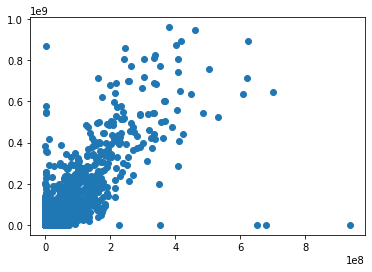

In [67]:
plt.scatter(bom_gross.domestic_gross, bom_gross.foreign_gross)

In [38]:
single_genre.loc[single_genre['primary_title'] == 'Clash of the Titans']

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
528,tt0800320,Clash of the Titans,Clash of the Titans,2010,106.0,Action,5.8,256176
529,tt0800320,Clash of the Titans,Clash of the Titans,2010,106.0,Adventure,5.8,256176
530,tt0800320,Clash of the Titans,Clash of the Titans,2010,106.0,Fantasy,5.8,256176


In [25]:
title_ratings['genre1'] = title_ratings['genres'].map(lambda x:x.split(',')[0]) 

AttributeError: 'float' object has no attribute 'split'

In [10]:

title_ratings['genres'].unique()

array(['Action,Crime,Drama', 'Biography,Drama', 'Drama', 'Comedy,Drama',
       'Comedy,Drama,Fantasy', 'Horror,Thriller',
       'Adventure,Animation,Comedy', 'History', 'Documentary',
       'Animation,Drama,History', 'Drama,Mystery',
       'Action,Animation,Comedy', 'Crime,Drama', nan,
       'Biography,Comedy,Drama', 'Action,Drama', 'Documentary,History',
       'Sci-Fi', 'Comedy', 'Thriller', 'Adventure,Animation,Sci-Fi',
       'Drama,Horror', 'Drama,Mystery,Thriller', 'Drama,Family',
       'Adventure,Comedy,Romance', 'Adventure,Drama,Romance',
       'Comedy,Crime,Drama', 'Biography', 'Horror',
       'Adventure,Comedy,Drama', 'Drama,Sci-Fi,Thriller', 'Action',
       'Comedy,Drama,Romance', 'Action,Adventure,Sci-Fi', 'Comedy,Family',
       'Adventure', 'Drama,History,War', 'Action,Thriller',
       'Comedy,Crime', 'Crime,Drama,Thriller', 'Action,Sci-Fi,Thriller',
       'Fantasy', 'Drama,Mystery,Sci-Fi', 'Biography,Drama,History',
       'Action,Comedy,Crime', 'Action,Advent

In [ ]:
beep = title_ratings[["genres", "averagerating"]]
ax = title_ratings.plot.bar(x='genres', y='averagerating', rot=0)

In [61]:
title_basics.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [62]:
imdb_titles.head()


,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0.0
4,tt0369610,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0.0


In [67]:
title_basics.loc[title_basics['tconst'] == 'tt0369610']

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
60,tt0369610,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi"


In [66]:
imdb_titles.loc[imdb_titles['title_id'] == 'tt0369610']

,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0.0
4,tt0369610,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0.0
5,tt0369610,15,Jurassic World,GR,NaN,imdbDisplay,NaN,0.0
6,tt0369610,16,Jurassic World,IT,NaN,imdbDisplay,NaN,0.0
7,tt0369610,17,Jurski svijet,HR,NaN,imdbDisplay,NaN,0.0
8,tt0369610,18,Olam ha'Yura,IL,he,imdbDisplay,NaN,0.0
9,tt0369610,19,Jurassic World: Mundo Jurásico,MX,NaN,imdbDisplay,NaN,0.0


In [120]:
budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [121]:
budgets[budgets.columns[3:6]] = budgets[budgets.columns[3:6]].replace('[\$,]', '', regex=True).astype(float)

budgets['profit'] = budgets['worldwide_gross']- budgets['production_budget']

In [122]:
budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,2.351345e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,6.350639e+08
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,-2.002376e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,1.072414e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,9.997217e+08


## Data Preparation

Describe and justify the process for preparing the data for analysis.

***
Questions to consider:
* Were there variables you dropped or created?
* How did you address missing values or outliers?
* Why are these choices appropriate given the data and the business problem?
***

In [10]:
ratings.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [32]:
budgets.head()

,id,release_date,title,production_budget,domestic_gross,worldwide_gross,profit
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,2.351345e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,6.350639e+08
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,-2.002376e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,1.072414e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,9.997217e+08


In [31]:

#budgets.rename(columns = {'movie':'title'}, inplace = True)
budgets['profit'] = budgets['worldwide_gross'] - budgets['production_budget']

In [28]:
budgets[budgets.columns[3:6]] = budgets[budgets.columns[3:6]].replace('[\$,]', '', regex=True).astype(float)

In [22]:
pd.merge(movie_gross,budgets,on='title')

,title,studio,domestic_gross_x,foreign_gross,year,id,release_date,production_budget,domestic_gross_y,worldwide_gross
0,Toy Story 3,BV,415000000.0,652000000,2010,47,"Jun 18, 2010","$200,000,000","$415,004,880","$1,068,879,522"
1,Inception,WB,292600000.0,535700000,2010,38,"Jul 16, 2010","$160,000,000","$292,576,195","$835,524,642"
2,Shrek Forever After,P/DW,238700000.0,513900000,2010,27,"May 21, 2010","$165,000,000","$238,736,787","$756,244,673"
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010,53,"Jun 30, 2010","$68,000,000","$300,531,751","$706,102,828"
4,Iron Man 2,Par.,312400000.0,311500000,2010,15,"May 7, 2010","$170,000,000","$312,433,331","$621,156,389"
...,...,...,...,...,...,...,...,...,...,...
1242,Gotti,VE,4300000.0,NaN,2018,64,"Jun 15, 2018","$10,000,000","$4,286,367","$6,089,100"
1243,Ben is Back,RAtt.,3700000.0,NaN,2018,95,"Dec 7, 2018","$13,000,000","$3,703,182","$9,633,111"
1244,Bilal: A New Breed of Hero,VE,491000.0,1700000,2018,100,"Feb 2, 2018","$30,000,000","$490,973","$648,599"
1245,Mandy,RLJ,1200000.0,NaN,2018,71,"Sep 14, 2018","$6,000,000","$1,214,525","$1,427,656"


In [18]:
# Here you run your code to clean the data
movie_gross = pd.read_csv('data/zippeddata/bom.movie_gross.csv.gz')
movie_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [124]:
#imdb_ratings = pd.read_csv('data/zippeddata/imdb.title.ratings.csv.gz')
rt_ratings = pd.read_csv('data/zippeddata/rt.reviews.tsv.gz', sep="\t", encoding= 'unicode_escape')
imdb_ratings = pd.read_csv('data/zippeddata/tmdb.movies.csv.gz')
#imdb_ratings.head()

In [75]:
title_crew = pd.read_csv('data/zippeddata/imdb.title.crew.csv.gz')
title_basics = pd.read_csv('data/zippeddata/imdb.title.basics.csv.gz')
#title_principals = pd.read_csv('data/zippeddata/imdb.title.principals.csv.gz')
name_basics = pd.read_csv('data/zippeddata/imdb.name.basics.csv.gz')

In [127]:
imdb_ratings.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [87]:
title_basics.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [91]:
title_crew.head()
title_crew.rename(columns = {'directors':'nconst'}, inplace = True)

In [90]:
name_basics.head()

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"


In [89]:
name_basics.loc[name_basics['nconst'] == 'nm0899854']

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
21429,nm0899854,Tony Vitale,1964.0,NaN,"producer,director,writer","tt0285252,tt0106489,tt0119465,tt0359774"


In [93]:
directors_list = pd.merge(title_crew, name_basics, on="nconst", how="inner", indicator=True)

In [99]:
imdb_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [102]:
title_directors = pd.merge(directors_list, title_basics, on="tconst", how="inner")

In [111]:
directors_ratings= pd.merge(directors_list, imdb_ratings, on="tconst", how="inner")

In [116]:
directors_ratings.head()

,tconst,nconst,writers,primary_name,birth_year,death_year,primary_profession,known_for_titles,_merge,averagerating,numvotes
0,tt0285252,nm0899854,nm0899854,Tony Vitale,1964.0,NaN,"producer,director,writer","tt0285252,tt0106489,tt0119465,tt0359774",both,3.9,219
1,tt0462036,nm1940585,nm1940585,Bill Haley,NaN,NaN,"director,writer,producer","tt0462036,tt6740510",both,5.5,18
2,tt0835418,nm0151540,"nm0310087,nm0841532",Jay Chandrasekhar,1968.0,NaN,"director,actor,writer","tt0144557,tt0486551,tt0331953,tt0247745",both,5.0,8147
3,tt0859635,nm0151540,"nm0151540,nm0373571,nm0501399,nm0815418,nm0831479",Jay Chandrasekhar,1968.0,NaN,"director,actor,writer","tt0144557,tt0486551,tt0331953,tt0247745",both,6.1,20104
4,tt0879859,nm2416460,NaN,Eric Manchester,NaN,NaN,"director,writer","tt0879861,tt0879859",both,6.8,21


In [117]:
directors_ratings.groupby('primary_name')['averagerating'].mean()

primary_name
A'Ali de Sousa      4.20
A. Blaine Miller    7.00
A. Cengiz Mert      3.20
A. Fishman          7.80
A. Haluk Unal       8.80
                    ... 
Ümit Degirmenci     1.30
Ümit Kivanç         7.90
Ümit Köreken        6.40
Ümit Uludag         9.20
Ümit Ünal           5.95
Name: averagerating, Length: 43209, dtype: float64

In [115]:
directors_ratings['primary_name'].value_counts()

Nayato Fio Nuala       35
Larry Rosen            30
Paul T.T. Easter       28
Michael Fredianelli    28
David DeCoteau         26
                       ..
Chris Hoffert           1
Alasdair Macleod        1
Joe Rendón              1
Claire Pijman           1
Alison Reid             1
Name: primary_name, Length: 43209, dtype: int64

In [107]:
big_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64996 entries, 0 to 64995
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   tconst              64996 non-null  object  
 1   nconst              64996 non-null  object  
 2   writers             56544 non-null  object  
 3   primary_name        64996 non-null  object  
 4   birth_year          20216 non-null  float64 
 5   death_year          557 non-null    float64 
 6   primary_profession  64941 non-null  object  
 7   known_for_titles    64485 non-null  object  
 8   _merge              64996 non-null  category
 9   primary_title       64996 non-null  object  
 10  original_title      64996 non-null  object  
 11  start_year          64996 non-null  int64   
 12  runtime_minutes     58447 non-null  float64 
 13  genres              64418 non-null  object  
 14  averagerating       64996 non-null  float64 
 15  numvotes            64996 non-null  

In [ ]:
df_film_length
conditions = [
    (df['runtime'] < 90 ),
    (df['runtime']> 90) && (df['runtime'] < 120),
    (df['runtime'] > 120)]
choices = ['short', 'medium', 'long']
df_film_length['color'] = np.select(conditions, choices)


## Data Modeling
Describe and justify the process for analyzing or modeling the data.

***
Questions to consider:
* How did you analyze or model the data?
* How did you iterate on your initial approach to make it better?
* Why are these choices appropriate given the data and the business problem?
***

In [136]:
# Here you run your code to model the data
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile

%matplotlib inline

In [140]:
# Here you run your code to explore the data
dfbom = pd.read_csv('data/zippeddata/bom.movie_gross.csv.gz')


df_imdb_name = pd.read_csv('data/zippeddata/imdb.name.basics.csv.gz')


df_imdb_titleb = pd.read_csv('data/zippeddata/imdb.title.basics.csv.gz')


# df = pd.read_csv('data/zippeddata/bom.movie_gross.csv')
# df.info()
# df.head()

df_imdb_title = pd.read_csv('data/zippeddata/imdb.title.crew.csv.gz')


df_imdb_principals = pd.read_csv('data/zippeddata/imdb.title.principals.csv.gz')

df_imdb_ratings = pd.read_csv('data/zippeddata/imdb.title.ratings.csv.gz')




df_tmdb_movies = pd.read_csv('data/zippeddata/tmdb.movies.csv.gz')


df_budget = pd.read_csv('data/zippeddata/tn.movie_budgets.csv.gz')

In [141]:
# cleaned the tdmb Budget data set
# converted the last 3 col to float and removed the $

df_budget[df_budget.columns[3:6]] = df_budget[df_budget.columns[3:6]].replace('[\$,]', '', regex=True).astype(float)

# created another row to determine wether the film grossed a profit
df_budget['profit'] = df_budget['worldwide_gross']- df_budget['production_budget']

# created a row of booleans returning True if profit exceeds 0
df_budget['fin_success'] =  (df_budget['profit'] > 0 )

df_budget.head()
df_budget['fin_success'].value_counts() # 3657 made money, 2125 lost money
df_budget['fin_success'].describe()     

df_imdb_comb = pd.merge(df_imdb_titleb,df_imdb_ratings,on='tconst')


#combined data frame from budget and imdb title 
df_budget_genre = df_budget.merge(df_imdb_titleb, left_on='movie', right_on='primary_title') 

#clean the genres into rows so they can be categorized
df_budget_genre['genres'] = df_budget_genre['genres'].str.strip().str.split(',')
single_genre = df_budget_genre.explode('genres')



budget_genre= df_budget.merge(single_genre, left_on='movie', right_on='primary_title')

budget_genre.drop(columns=['id_x','movie_x', 'production_budget_x', 'id_y', 'release_date_y', 
                           'production_budget_y', 'domestic_gross_y', 'worldwide_gross_y', 
                           'profit_y', 'fin_success_y', 'tconst','primary_title', 
                           'original_title', 'start_year' ], inplace = True )


budget_genre['release_month'] = df_budget_genre['release_date'].map(lambda x : x[:3])

budget_genre

,release_date_x,domestic_gross_x,worldwide_gross_x,profit_x,fin_success_x,movie_y,runtime_minutes,genres,release_month
0,"Dec 18, 2009",760507625.0,2.776345e+09,2.351345e+09,True,Avatar,93.0,Horror,Dec
1,"May 20, 2011",241063875.0,1.045664e+09,6.350639e+08,True,Pirates of the Caribbean: On Stranger Tides,136.0,Action,May
2,"May 20, 2011",241063875.0,1.045664e+09,6.350639e+08,True,Pirates of the Caribbean: On Stranger Tides,136.0,Adventure,Jun
3,"May 20, 2011",241063875.0,1.045664e+09,6.350639e+08,True,Pirates of the Caribbean: On Stranger Tides,136.0,Fantasy,May
4,"Jun 7, 2019",42762350.0,1.497624e+08,-2.002376e+08,False,Dark Phoenix,113.0,Action,Apr
...,...,...,...,...,...,...,...,...,...
8745,"Dec 31, 2018",0.0,0.000000e+00,-7.000000e+03,False,Red 11,77.0,Sci-Fi,NaN
8746,"Dec 31, 2018",0.0,0.000000e+00,-7.000000e+03,False,Red 11,77.0,Thriller,NaN
8747,"Sep 29, 2015",0.0,0.000000e+00,-1.400000e+03,False,A Plague So Pleasant,76.0,Drama,NaN
8748,"Sep 29, 2015",0.0,0.000000e+00,-1.400000e+03,False,A Plague So Pleasant,76.0,Horror,NaN


<ipython-input-142-5e219fe9ec22>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_film_length['length'] = df_film_length['runtime_minutes'].map(lambda x :


<AxesSubplot:xlabel='runtime_minutes', ylabel='profit_x'>

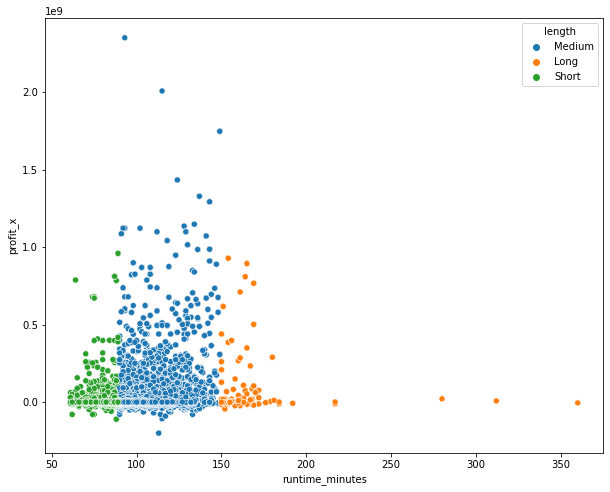

In [142]:
# analysis of run time vs success rate

budget_genre['runtime_minutes'].describe()

df_film_length = budget_genre[budget_genre['runtime_minutes'] > 60]

df_film_length.describe()


df_film_length['length'] = df_film_length['runtime_minutes'].map(lambda x : 
                                                                 'Short' if x < 90 
                                                                 else('Medium' if x < 150 else 'Long'))


length_total = dict(df_film_length.groupby('length')['genres'].count())
length_success = dict(df_film_length[df_film_length['fin_success_x'] == True].groupby('length')['genres'].count())

g1= length_success
g2= length_total

g3={x:float(g1[x])/g2[x] for x in g2}


fig_dims = (10, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.scatterplot(data=df_film_length, x="runtime_minutes", y="profit_x", hue="length")

In [149]:
clean_film_length = df_film_length[(df_film_length['runtime_minutes'] < 250) & (df_film_length['profit_x'] < 1500000000)]

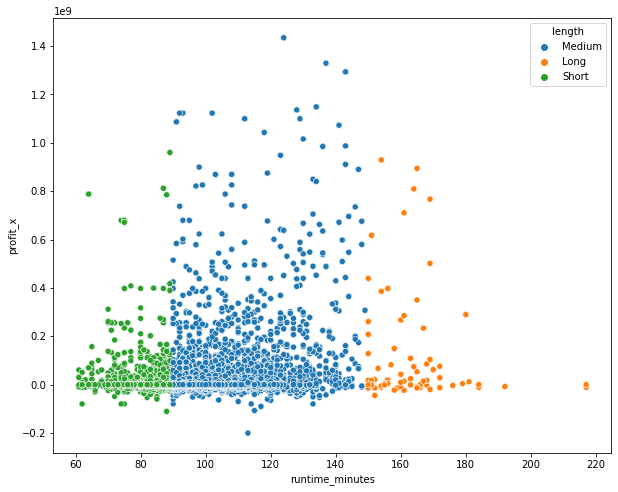

In [163]:
fig_dims = (10, 8)
fig, ax = plt.subplots(figsize=fig_dims)
g = sns.scatterplot(data=clean_film_length, x="runtime_minutes", y="profit_x", hue="length")

AttributeError: 'AxesSubplot' object has no attribute 'fig'

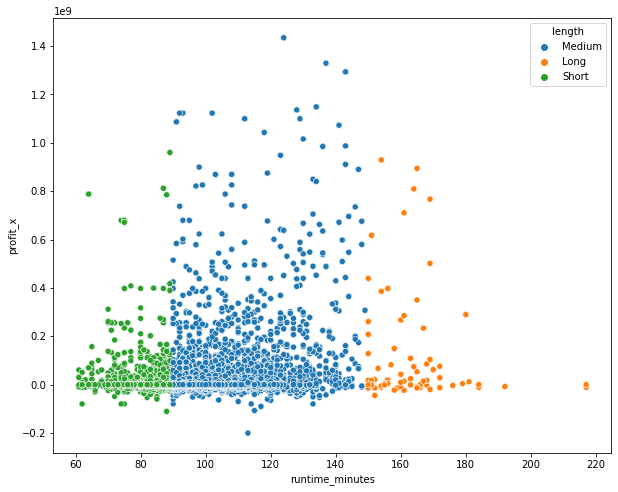

In [165]:
fig_dims = (10, 8)
fig, ax = plt.subplots(figsize=fig_dims)

lm = sns.scatterplot(data=clean_film_length, x="runtime_minutes", y="profit_x", hue="length")

# Access the figure
fig = lm.fig 

# Add a title to the Figure
fig.suptitle("My figtitle", fontsize=12)

## Evaluation
Evaluate how well your work solves the stated business problem.

***
Questions to consider:
* How do you interpret the results?
* How well does your model fit your data? How much better is this than your baseline model?
* How confident are you that your results would generalize beyond the data you have?
* How confident are you that this model would benefit the business if put into use?
***

## Conclusions
Provide your conclusions about the work you've done, including any limitations or next steps.

***
Questions to consider:
* What would you recommend the business do as a result of this work?
* What are some reasons why your analysis might not fully solve the business problem?
* What else could you do in the future to improve this project?
***